# Empirical Analysis of Fibonacci Algorithms

The Fibonacci sequence is a well-known mathematical concept that has applications in various fields, including computer science, finance, and nature. In this notebook, we will explore different algorithms for computing the Fibonacci sequence and analyze their performance characteristics.

## **0. Importing Required Libraries**

The following libraries are imported to facilitate the implementation and analysis of the Fibonacci algorithms:

- `time`: Used for measuring the execution time of the algorithms.
- `pandas`: Utilized for creating and manipulating dataframes to store and analyze results.
- `numpy`: Provides support for numerical operations, including the calculation of Binet's formula.
- `matplotlib.pyplot`: Used for plotting graphs to visualize the performance of the algorithms.
- `ipywidgets`: Enables interactive widgets in Jupyter Notebooks for user input.
- `IPython.display`: Facilitates the display of widgets and other outputs in the notebook.
- `os`: Provides functions to interact with the operating system, such as file path manipulations.
- `concurrent.futures`: Allows for concurrent execution of functions, useful for implementing timeouts.

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import display
import os

## **1. Introduction**
The Fibonacci sequence is a fundamental mathematical concept with applications in computer science, cryptography, and numerical analysis. It is defined recursively as:

$$
F(n) =
\begin{cases}
    0, & n = 0 \\
    1, & n = 1 \\
    F(n-1) + F(n-2), & n \geq 2
\end{cases}
$$

Computing the Fibonacci sequence efficiently is crucial in algorithm design, as different methods exhibit varying performance characteristics. This study aims to empirically analyze and compare six different approaches to computing the Fibonacci sequence in terms of execution time.

## **2. Objectives**
The primary objectives of this laboratory work are:
- To implement and compare six Fibonacci algorithms.
- To analyze the empirical performance of each algorithm.
- To determine the most efficient method for different input sizes.
- To visualize execution time trends using graphical representations.

## **3. Implementing Fibonacci Methods**

The following six methods for computing the Fibonacci sequence are implemented and analyzed:

### **3.1 Naïve Recursive Approach (Exponential $O(2^n)$)**
This method directly implements the recursive Fibonacci formula.

- **Inefficient for large $n$** due to redundant calculations.
- Demonstrates **exponential time complexity**.

> **Time Complexity**: $O(2^n)$ - Exponential
>
> **Space Complexity**: $O(n)$ - Due to recursive call stack


In [2]:
def fib_recursive(n):
    if n > 40:
        return "X"
    if n <= 1:
        return n
    return fib_recursive(n - 1) + fib_recursive(n - 2)

In [3]:
# Test the recursive function with n = 10
print(fib_recursive(10)) # Output: 55

55


### **3.2 Recursive with Memoization (Top-Down DP, $O(n)$)**

This method avoids redundant calculations by storing previously computed values. It uses a dictionary to store Fibonacci values, reducing time complexity from $O(2^n)$ to $O(n)$.

- Stores previously computed values to avoid redundant calculations.
- Significantly improves efficiency over naive recursion.

> **Time Complexity**: $O(n)$ - Linear
>
> **Space Complexity**: $O(n)$ - Due to recursive call stack and memoization dictionary

In [4]:
def fib_memoized(n, memo=None):
    if n > 2970:
        return "X"
    if memo is None:
        memo = {}
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fib_memoized(n - 1, memo) + fib_memoized(n - 2, memo)
    return memo[n]

In [5]:
# Test the memoized function with n = 10
print(fib_memoized(10)) # Output: 55

55


### **3.3 Iterative Dynamic Programming (Bottom-Up DP, $O(n)$)**

This method builds the Fibonacci sequence iteratively, avoiding recursion overhead. It uses a list to store computed values, reducing time complexity to $O(n)$.

- Builds the Fibonacci sequence iteratively using an array.
- Eliminates recursion overhead but uses $O(n)$ space.

> **Time Complexity**: $O(n)$ - Linear
>
> **Space Complexity**: $O(n)$ - Due to storing computed Fibonacci values

In [6]:
def fib_iterative(n):
    if n <= 1:
        return n
    fib = [0, 1]
    for i in range(2, n + 1):
        fib.append(fib[i - 1] + fib[i - 2])
    return fib[n]

In [7]:
# Test the iterative function with n = 10
print(fib_iterative(10)) # Output: 55

55


### **3.4 Matrix Exponentiation (Logarithmic $O(\log n)$)**

This method leverages matrix multiplication to achieve an efficient \(O(\log n)\) complexity. Based on the transformation:

$$
\begin{bmatrix}
F(n) \\
F(n-1)
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 \\
1 & 1
\end{bmatrix}^n
\cdot
\begin{bmatrix}
F(0) \\
F(1)
\end{bmatrix}
$$

- Uses matrix multiplication to compute Fibonacci numbers efficiently.
- Well-suited for very large values of \(n\).

> **Time Complexity**: $O(\log n)$ - Due to matrix exponentiation
>
> **Space Complexity**: $O(1)$ - Constant space

In [8]:
def fib_matrix(n):
    def matrix_mult(A, B):
        return [[A[0][0] * B[0][0] + A[0][1] * B[1][0], A[0][0] * B[0][1] + A[0][1] * B[1][1]],
                [A[1][0] * B[0][0] + A[1][1] * B[1][0], A[1][0] * B[0][1] + A[1][1] * B[1][1]]]

    def matrix_power(matrix, p):
        if p == 1:
            return matrix
        if p % 2 == 0:
            half_pow = matrix_power(matrix, p // 2)
            return matrix_mult(half_pow, half_pow)
        else:
            return matrix_mult(matrix, matrix_power(matrix, p - 1))

    base_matrix = [[0, 1], [1, 1]]
    result = matrix_power(base_matrix, n)
    return result[0][1]

In [9]:
# Test the matrix exponentiation function with n = 10
print(fib_matrix(10)) # Output: 55

55


### **3.5 Binet’s Formula (Constant $O(1)$)**

This method directly computes Fibonacci numbers using the Golden Ratio (Phi). While computationally $O(1)$, floating-point precision errors make it unreliable for large $n$. Based on the formula:

$$
F(n) = \frac{\varphi^n - (-\varphi)^{-n}}{\sqrt{5}}
$$

- Uses the closed-form equation derived from the Golden Ratio.
- Extremely fast but suffers from precision errors for large $n$.

> **Time Complexity**: $O(1)$ - Constant
>
> **Space Complexity**: $O(1)$ - Constant

In [10]:
def fib_binet(n):
    if n > 70:
        return "Overflow"
    phi = (1 + np.sqrt(5)) / 2
    psi = (1 - np.sqrt(5)) / 2
    return int((phi ** n - psi ** n) / np.sqrt(5))

In [11]:
# Test the Binet's formula function with n = 10
print(fib_binet(10)) # Output: 55

55


### **3.6 Optimized Iterative Approach ($O(n)$ Time, $O(1)$ Space)**

This method only stores the last two computed values, reducing space complexity to $O(1)$. Efficient for computing Fibonacci numbers for large values of $n$.

- Iterative method storing only the last two computed values.
- The most memory-efficient approach while maintaining linear time complexity.

> **Time Complexity**: $O(n)$ - Linear
>
> **Space Complexity**: $O(1)$ - Constant

In [12]:
def fib_optimized(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

In [13]:
# Test the optimized iterative function with n = 10
print(fib_optimized(10)) # Output: 55

55


## **4. Experimental Setup**

The empirical analysis of Fibonacci algorithms involves the following steps:
1. **Input Values**: Define small, large, and custom input sets for testing.
2. **Performance Measurement**: Measure the execution time of each algorithm for different input sizes.
3. **Results Analysis**: Compare the performance of the algorithms using tables and graphs.

### **4.1 Input Values**

The algorithms are tested on three sets of input values:
- **Small Input Set**: $n = \{5, 10, 20, 30, 40\}$
  - Used to verify correctness and evaluate all six methods.
- **Large Input Set**: $n = \{501, 794, 1000, 1585, 2512, 3981\}$
  - Used to test performance of **fast methods only** (excluding recursive approaches).
- **User Input Set**: Custom values provided by the user
  - Allows for testing with specific input sizes as needed.

In [14]:
# Default input values for testing
small_inputs = [5, 10, 20, 30, 50, 100]
large_inputs = [501, 794, 1000, 1585, 2512, 3981, 5000, 7000, 10000, 15000, 20000]

### **4.2 Performance Measurement**

- Execution time for each method is measured using Python’s `time` module to ensure accurate timing.
- Results are stored in a structured table using the `pandas` library for easy manipulation and analysis.
- A timeout mechanism is implemented using the `concurrent.futures` module to handle long-running computations.
- Custom input values can be provided by the user through interactive widgets, allowing for flexible testing scenarios.

In [15]:
# List of functions to test
fib_methods = {
    "Recursive": fib_recursive,
    "Memoized": fib_memoized,
    "Iterative DP": fib_iterative,
    "Matrix Exp": fib_matrix,
    "Binet": fib_binet,
    "Iterative O(1)": fib_optimized
}

In [16]:
def measure_time(func, n, trials=10):
    result = func(n)

    times = []

    for _ in range(trials):
        start = time.perf_counter_ns()
        result = func(n)
        end = time.perf_counter_ns()

        exec_time = (end - start) / 1e9
        times.append(exec_time)

    return result, np.median(times)


In [17]:
def test_fibonacci_performance(fib_methods, small_inputs, large_inputs):
    results = []
    test_values = small_inputs + large_inputs
    print(f"Testing Fibonacci methods for: {test_values}")

    for n in test_values:
        row = {"N": n}

        for name, func in fib_methods.items():
            result, exec_time = measure_time(func, n)

            if result == "X" or result == "Overflow":
                row[f"{name}"] = result
            else:
                row[f"{name}"] = exec_time

        results.append(row)

    return pd.DataFrame(results)

In [18]:
# Run performance test
df_results = test_fibonacci_performance(fib_methods, small_inputs, large_inputs)

Testing Fibonacci methods for: [5, 10, 20, 30, 50, 100, 501, 794, 1000, 1585, 2512, 3981, 5000, 7000, 10000, 15000, 20000]


## **5. Results and Analysis**

The performance of the Fibonacci algorithms is evaluated based on the execution time for different input sizes. The results are presented in tabular format and visualized using graphs to highlight the trends.

### **5.1 Execution Time Table**

The table below presents the execution time (in seconds) for each algorithm.
> *(X = Too slow to complete, Overflow = Floating-point precision exceeded)*

In [19]:
# Display results in tabular format
display(df_results)

,N,Recursive,Memoized,Iterative DP,Matrix Exp,Binet,Iterative O(1)
0,5,0.000001,0.000001,2.915000e-07,0.000001,0.000002,1.670000e-07
1,10,0.000005,0.000001,4.580000e-07,0.000001,0.000002,2.295000e-07
2,20,0.000623,0.000002,7.500000e-07,0.000002,0.000002,3.750000e-07
3,30,0.073292,0.000003,1.020500e-06,0.000002,0.000002,5.000000e-07
4,50,X,0.000005,1.646000e-06,0.000003,0.000002,8.335000e-07
5,100,X,0.00001,3.375000e-06,0.000003,Overflow,1.646000e-06
6,501,X,0.000072,2.002050e-05,0.000006,Overflow,1.024950e-05
7,794,X,0.000119,3.422900e-05,0.000006,Overflow,1.895850e-05
8,1000,X,0.000147,4.416650e-05,0.000007,Overflow,2.516700e-05
9,1585,X,0.000239,7.908350e-05,0.000010,Overflow,4.804200e-05


In [20]:
# Export results to CSV file
def export_results(df):
    filename = "fibonacci_results.csv"
    df.to_csv(filename, index=False)
    print(f"\nResults exported successfully to {os.path.abspath(filename)}")

In [21]:
export_results(df_results)


Results exported successfully to /Users/sergiu/Projects/algorithms_analysis/notebooks/01-fibonacci/fibonacci_results.csv


### **5.2 Performance Graph**

The following graph visualizes the execution time of different Fibonacci algorithms for varying input sizes. The y-axis is plotted on a logarithmic scale to accommodate the wide range of execution times.

In [22]:
# Convert "Too Slow" and "Skipped" to NaN for clean plotting
df_numeric = df_results.replace({"X": None, "Overflow": None})

# Ensure all values are numeric
df_numeric = df_numeric.astype(float)

In [23]:
# Filter data for small and large inputs
df_small = df_numeric[df_numeric["N"] <= 100]
df_large = df_numeric[df_numeric["N"] > 100]

In [24]:
# Get the min and max values for the y-axis (time) to keep it consistent
y_min = df_numeric.drop(columns=["N"]).min().min()
y_max = df_numeric.drop(columns=["N"]).max().max()

In [25]:
# Ensure base plot directories exist
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

create_directory("plots/small")
create_directory("plots/large")

In [26]:
# Plot the performance results
def plot_fibonacci_performance(df, size_category):
    methods = ["Matrix Exp", "Iterative O(1)", "Iterative DP", "Memoized", "Binet", "Recursive"]
    has_valid_data = False

    combined_fig, combined_ax = plt.subplots(figsize=(14, 10))

    for method in methods:
        if method in df.columns and df[method].notna().any():
            has_valid_data = True

            y_min_algo = max(df[method].min() * 0.8, 1e-7)
            y_max_algo = min(df[method].max() * 1.2, 2)

            if y_max_algo - y_min_algo < 1e-4:
                y_max_algo = y_min_algo + y_max_algo

            linthresh_value = y_min_algo

            plt.figure(figsize=(10, 6))
            plt.plot(df["N"], df[method], label=method, marker="o", markersize=6, linestyle='-', linewidth=1.5)
            plt.xlabel("Input Size (N)", fontsize=10)
            plt.ylabel("Execution Time (seconds)", fontsize=10)
            plt.yscale("symlog", linthresh=linthresh_value)
            plt.ylim(y_min_algo, y_max_algo)
            plt.title(f"{method} Performance ({size_category.capitalize()} Inputs)", fontsize=10)
            plt.legend(title="Algorithm", fontsize=10, title_fontsize='9')
            plt.grid(True, which="both", linestyle="--", alpha=0.5)
            plt.savefig(f"plots/{size_category}/fibonacci_performance_{size_category}_{method}.png", dpi=300)
            plt.close()

            combined_ax.plot(df["N"], df[method], label=method, marker="o", markersize=6, linestyle='-', linewidth=1.5)

    if has_valid_data:
        plt.xlabel("Input Size (N)", fontsize=14)
        plt.ylabel("Execution Time (seconds)", fontsize=14)
        combined_ax.set_yscale("symlog", linthresh=1e-6)
        combined_ax.set_ylim(max(df.min().min() * 0.8, 1e-7), min(df.max().max() * 1.2, 1e-2))
        plt.title(f"Fibonacci Algorithms Performance ({size_category.capitalize()} Inputs)", fontsize=16)
        plt.legend(title="Algorithms", fontsize=12, title_fontsize='13')
        plt.grid(True, which="both", linestyle="--", alpha=0.5)
        plt.tight_layout()
        plt.savefig(f"plots/fibonacci_performance_{size_category}.png", dpi=300, bbox_inches="tight")
        plt.show()
        plt.close()

In [27]:
def plot_combined_performance(df):
        methods = ["Matrix Exp", "Iterative O(1)", "Iterative DP", "Memoized", "Binet", "Recursive"]
        combined_fig, combined_ax = plt.subplots(figsize=(14, 10))

        for method in methods:
            if method in df.columns and df[method].notna().any():
                combined_ax.plot(df["N"], df[method], label=method, marker="o", markersize=6, linestyle='-', linewidth=1.5)

        plt.xlabel("Input Size (N)", fontsize=14)
        plt.ylabel("Execution Time (seconds)", fontsize=14)
        combined_ax.set_yscale("log")
        combined_ax.set_xscale("log")
        combined_ax.set_ylim(max(df.min().min() * 0.8, 1e-7), min(df.max().max() * 1.2, 1e-2))
        combined_ax.set_xlim(df["N"].min() * 0.8, df["N"].max() * 1.2)
        plt.title("Fibonacci Algorithms Performance (Combined Inputs)", fontsize=16)
        plt.legend(title="Algorithms", fontsize=12, title_fontsize='13')
        plt.grid(True, which="both", linestyle="--", alpha=0.5)
        plt.tight_layout()
        plt.savefig("plots/fibonacci_performance_combined.png", dpi=300, bbox_inches="tight")
        plt.show()
        plt.close()

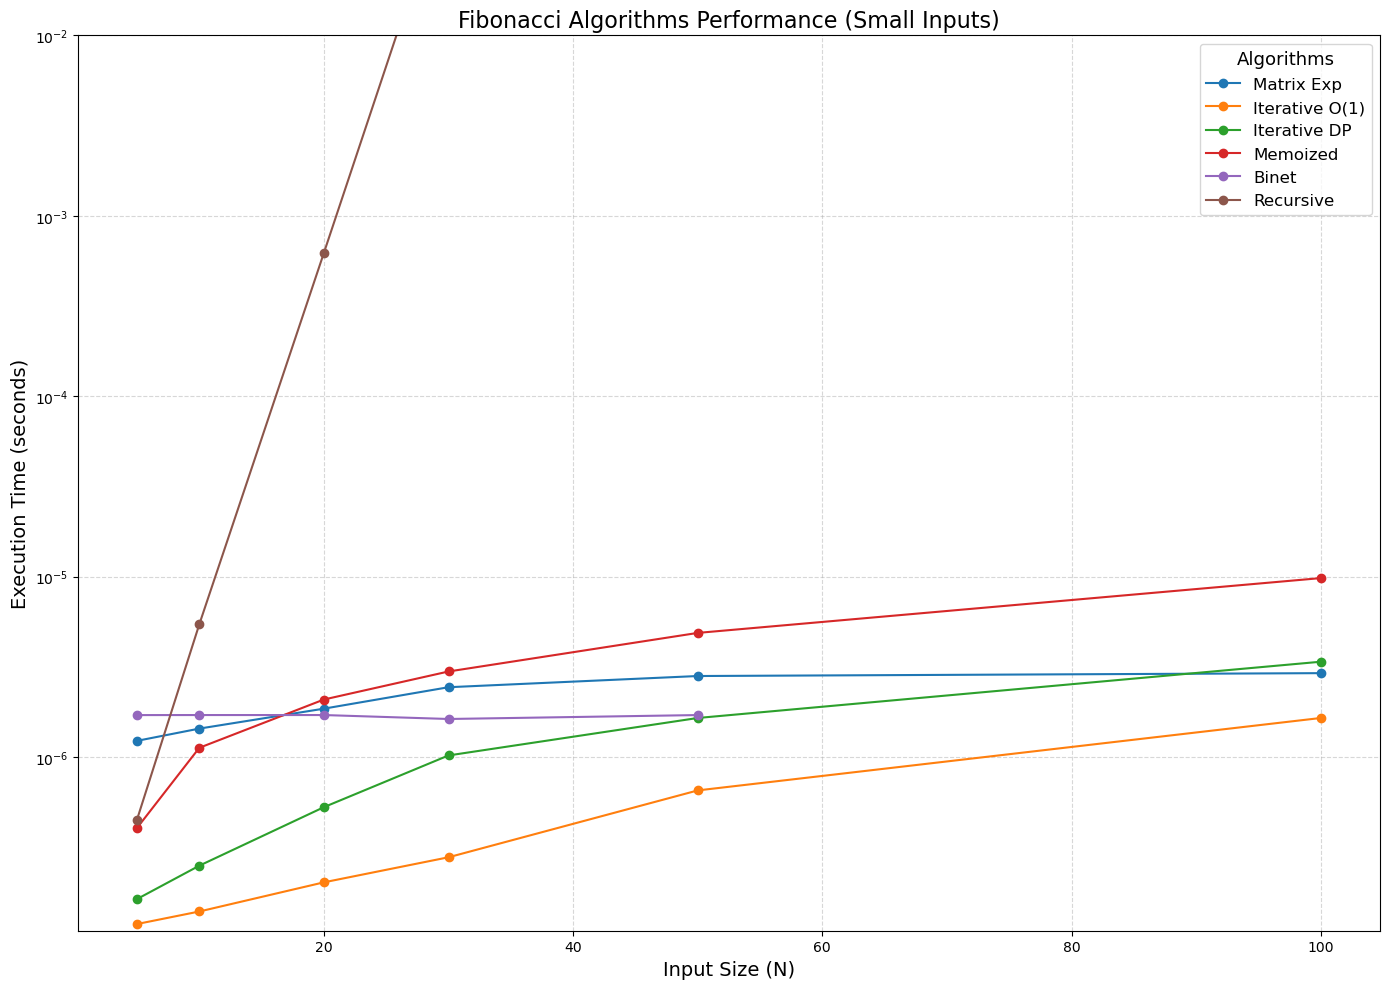

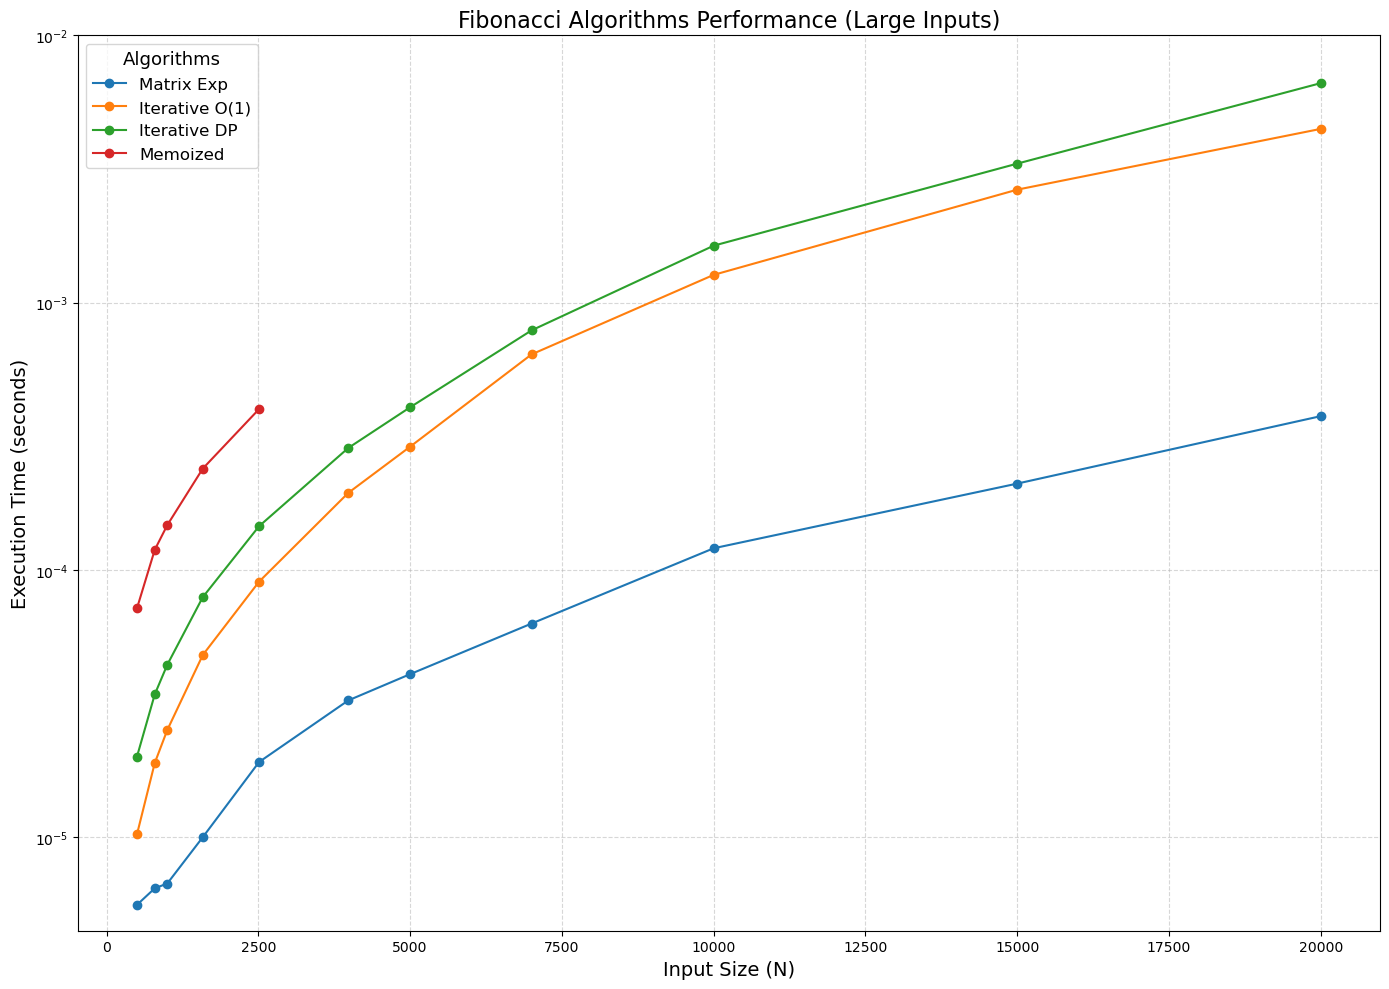

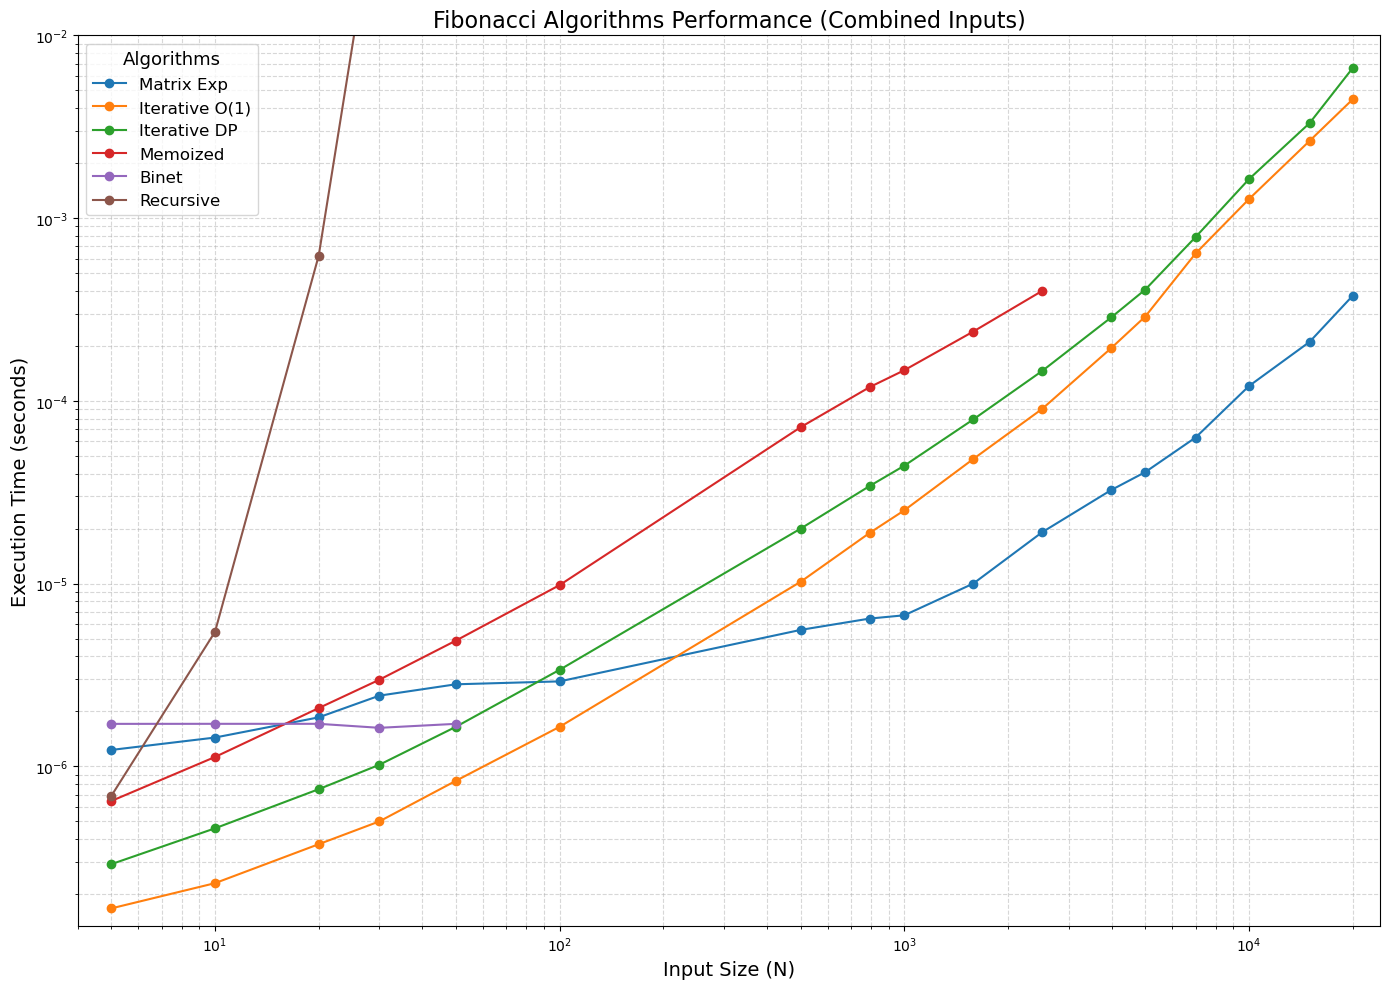

In [28]:
# Generate and save plots for small and large input sets
plot_fibonacci_performance(df_small, "small")
plot_fibonacci_performance(df_large, "large")
plot_combined_performance(df_numeric)

## **6. Conclusion**

This study empirically analyzed six different algorithms for computing the Fibonacci sequence and compared their performance characteristics. The key findings and recommendations based on the results are summarized below.

### **6.1 Key Findings**

The empirical analysis of Fibonacci computation methods highlights significant performance variations:

- 🚀 **Recursive Approach**: Highly inefficient due to exponential time complexity $O(2^n)$, making it impractical for large $n$.
- 🛠 **Memoization & Iterative DP**: Both offer linear time complexity $O(n)$ and effectively reduce redundant calculations, making them suitable for moderate input sizes.
- ⚡ **Matrix Exponentiation**: The most efficient method for large $n$, achieving logarithmic complexity $O(\log n)$.
- 🔢 **Binet’s Formula**: The fastest method in theory but unreliable for large $n$ due to floating-point precision errors.
- 🎯 **Optimized Iterative Approach $O(1)$ Space**: Provides a balance between speed and memory efficiency, making it a practical choice for real-world applications.

### **6.2 Choosing the Optimal Algorithm**

The table below outlines the best algorithm based on different use cases:

| **Use Case**                   | **Recommended Algorithm**            | **Rationale**                                        |
|--------------------------------|--------------------------------------|------------------------------------------------------|
| **Small $(n \leq 30)$**        | Recursive (for learning purposes)    | Simple and educational, but inefficient              |
| **Moderate $(n < 10^5)$**      | Memoization (Top-Down DP)            | Eliminates redundant computations, runs in $O(n)$    |
| **Large $(n < 10^6)$**         | Iterative DP or Optimized Iterative  | Efficient, avoids recursion overhead                 |
| **Very Large $(n > 10^6)$**    | Matrix Exponentiation                | Fastest for extremely large $n$, runs in $O(\log n)$ |
| **Quick Approximation Needed** | Binet’s Formula (for small $n$ only) | Instantaneous but unreliable for large $n$           |

### **6.3 Final Remarks**

This study underscores the importance of **choosing the right algorithm based on problem constraints**. While **recursive methods** are useful for learning, they become impractical for large input sizes. **Memoization and Iterative DP** improve efficiency but remain **linear in complexity**. **Matrix Exponentiation** provides the best trade-off between speed and scalability for extremely large numbers.

---